# Análise Exploratória de Dados: Obesity Levels

### Importando as bibliotecas

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from IPython.display import display, Markdown

### 1. Coleta dos dados

In [14]:
df = pd.read_csv("../kaggle/ObesityDataSet_raw_and_data_sinthetic.csv")
display(df)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### 2. Descrição dos dados

#### Conjunto de Dados "Obesity Levels"

O conjunto de dados "Obesity Levels" contém informações cruciais sobre características demográficas, hábitos alimentares, histórico familiar e níveis de atividade física de indivíduos, com foco na classificação da obesidade. Estes dados são essenciais para compreender os fatores associados à obesidade e são frequentemente utilizados em tarefas de aprendizado de máquina supervisionado para desenvolver algoritmos de análise de dados relacionados à saúde e estilo de vida.

### 2.1. Distribuição dos dados

In [19]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,1401,1866,NaN,NaN,2015,2067,NaN,1726,NaN,NaN,1765,1580,351
mean,24.312600,NaN,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,6.345968,NaN,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.947192,NaN,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,22.777890,NaN,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,26.000000,NaN,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


### 2.2. Dicionário de dados

In [16]:
dicionario = pd.DataFrame([
    {
        "variavel": "Age",
        "descricao": "Idade do indíviduo",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Gender",
        "descricao": "Gênero do indíviduo (male/female)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "Height",
        "descricao": "Altura do indíviduo (em metros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "Weight",
        "descricao": "Peso do indíviduo (em quilogramas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CALC",
        "descricao": "Frequência do consumo de álcool do indíviduo",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAVC",
        "descricao": "Frequência do consumo de alimentos com alto índice calórico",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FCVC",
        "descricao": "Frequencia do consumo de vegetais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "NCP",
        "descricao": "Número de refeições principais do indivíduo",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },
    {
        "variavel": "SCC",
        "descricao": "Se o indivíduo realiza monitoração das calorias consumidas diariamentes",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "SMOKE",
        "descricao": "Se o indivíduo é fumante",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "CH2O",
        "descricao": "Consumo de água do indivíduo (em litros)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "family_history_with_overweight",
        "descricao": "Histórico familiar de sobrepeso",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "FAF",
        "descricao": "Tempo gasto em atividades físicas (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "TUE",
        "descricao": "Tempo gasto em dispositivos tecnológicos, como celulares e outros (em horas)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {
        "variavel": "CAEC",
        "descricao": "Consumo de comida entre as refeições (café da manhã, almoço, jantar)",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "MTRANS",
        "descricao": "Meio de transporte usado regularmente",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },
    {
        "variavel": "NObeyesdad",
        "descricao": "Classificação de obesidade",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    }
])

dicionario.to_csv('../data/external/dictionary.csv', index=False)

#### Variáveis do Conjunto de Dados:

1. **Age (Idade)**: Representa a idade do indivíduo em anos. Esta variável é quantitativa e contínua.

2. **Gender (Gênero)**: Indica o gênero do indivíduo (masculino/feminino). Esta variável é qualitativa e nominal.

3. **Height (Altura)**: Refere-se à altura do indivíduo em metros. Esta variável é quantitativa e contínua.

4. **Weight (Peso)**: Indica o peso do indivíduo em quilogramas. Esta variável é quantitativa e contínua.

5. **CALC (Consumo de Álcool)**: Representa a frequência do consumo de álcool pelo indivíduo. Esta variável é qualitativa e nominal.

6. **FAVC (Consumo de Alimentos Calóricos)**: Indica a frequência do consumo de alimentos com alto teor calórico pelo indivíduo. Esta variável é qualitativa e nominal.

7. **FCVC (Consumo de Vegetais)**: Refere-se à frequência do consumo de vegetais pelo indivíduo. Esta variável é quantitativa e discreta.

8. **NCP (Número de Refeições Principais)**: Indica o número de refeições principais do indivíduo por dia. Esta variável é quantitativa e discreta.

9. **SCC (Monitoramento de Calorias Consumidas)**: Indica se o indivíduo realiza monitoramento das calorias consumidas diariamente. Esta variável é qualitativa e nominal.

10. **SMOKE (Hábito de Fumar)**: Indica se o indivíduo é fumante. Esta variável é qualitativa e nominal.

11. **CH2O (Consumo de Água)**: Representa o consumo de água do indivíduo em litros. Esta variável é quantitativa e contínua.

12. **Family_history_with_overweight (Histórico Familiar de Sobrepeso)**: Indica se o indivíduo possui histórico familiar de sobrepeso. Esta variável é qualitativa e nominal.

13. **FAF (Atividade Física)**: Refere-se ao tempo gasto em atividades físicas pelo indivíduo em horas. Esta variável é quantitativa e contínua.

14. **TUE (Tempo de Uso de Tecnologia)**: Indica o tempo gasto em dispositivos tecnológicos, como celulares, em horas. Esta variável é quantitativa e contínua.

15. **CAEC (Consumo de Comida entre Refeições)**: Representa o consumo de comida entre as refeições (café da manhã, almoço, jantar) pelo indivíduo. Esta variável é qualitativa e nominal.

16. **MTRANS (Meio de Transporte)**: Indica o meio de transporte usado regularmente pelo indivíduo. Esta variável é qualitativa e nominal.

17. **NObeyesdad (Classificação de Obesidade)**: Refere-se à classificação de obesidade do indivíduo. Esta variável é qualitativa e ordinal.

### 3. Perguntas de partida e hipóteses


   ##### 3.1. Correlação entre a idade e nível de obesidade
   ##### 3.2. Diferença do gênero na prevalência da obesidade
   ##### 3.3. Impacto do consumo do álcool e tabagismo na obesidade
   ##### 3.4. Relação entre a altura, o peso e a obesidade
   ##### 3.5. Influência do histórico familiar na obesidade
   ##### 3.6. Associação entre hábitos alimentares e obesidade
   ##### 3.7. Correlação entre atividade física e obesidade
   ##### 3.8. Correlação entre o tempo gasto em dispositivos tecnológicos e obesidade

#### 3.1 Correlação entre a idade e o nível de obesidade

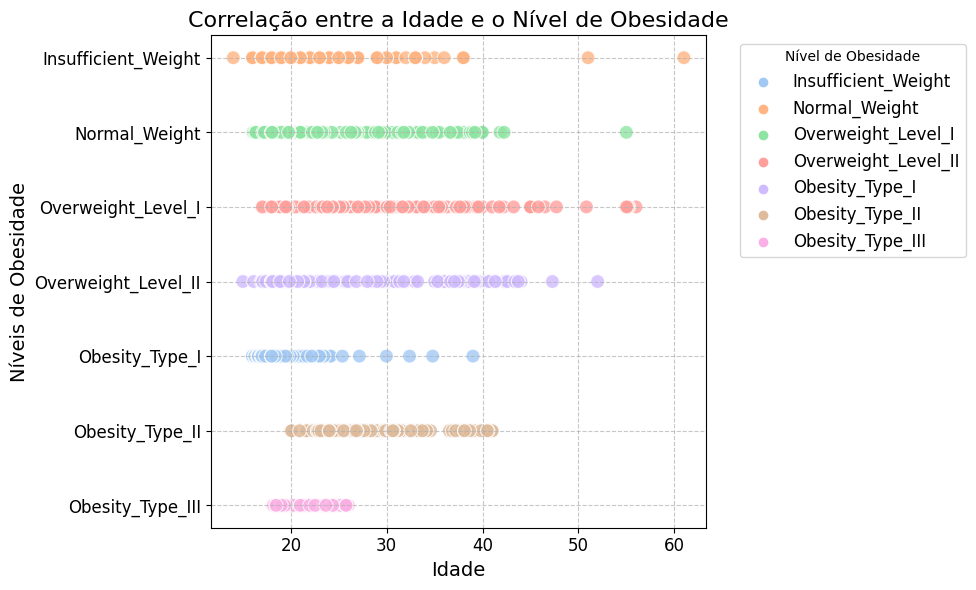

In [28]:
categorias = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Definir paleta de cores
cores = sns.color_palette("pastel", len(categorias))

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='NObeyesdad', hue='NObeyesdad', hue_order=categorias, palette=cores, s=100, alpha=0.8)
plt.title('Correlação entre a Idade e o Nível de Obesidade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Níveis de Obesidade', fontsize=14)
plt.yticks(ticks=range(len(categorias)), labels=categorias, fontsize=12)
plt.xticks(fontsize=12)
# Remover legenda gerada automaticamente pelo seaborn
plt.legend([], [], title='Nível de Obesidade')  
# Adicionar legenda personalizada com cores corretas
handles = [plt.scatter([], [], color=cor, label=cat) for cor, cat in zip(cores, categorias)]
plt.legend(handles, categorias, title='Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
faixas_etarias = pd.cut(df['Age'], bins=[18, 30, 40, 50, np.inf], labels=['18-30', '31-40', '41-50', '50+'])
contagem_obesidade_por_faixa_etaria = df.groupby([faixas_etarias, 'NObeyesdad'])['NObeyesdad'].count().unstack()
display(contagem_obesidade_por_faixa_etaria)

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Age,,,,,,,
18-30,189,201,226,187,323,216,172
31-40,3,16,62,98,0,40,80
41-50,0,0,23,12,0,2,10
50+,0,2,1,0,0,1,6


Com base nas informações geradas, podemos observar a distribuição dos diferentes níveis de obesidade em relação às faixas etárias.

1: **Insufficient Weight**: Observamos que a maioria dos casos de peso insuficiente (Insufficient Weight) ocorre na faixa etária de 18 a 30 anos, com uma contagem significativa em comparação com outras faixas etárias.  

2: **Normal Weight**: Da mesma forma, a maioria dos casos de peso normal (Normal Weight) também está concentrada na faixa etária de 18 a 30 anos, embora haja uma distribuição mais uniforme em comparação com o peso insuficiente. 

3: **Overweight Level I e II**: Os casos de sobrepeso (Overweight) também têm uma distribuição mais concentrada na faixa etária de 18 a 30 anos, embora ainda estejam presentes em outras faixas etárias, especialmente entre 31 e 40 anos.  

4: **Obesity Type I, II e III**: Os casos de obesidade, tanto Tipo I, II quanto III, são mais prevalentes na faixa etária de 18 a 30 anos, com uma contagem considerável em comparação com outras faixas etárias. Isso sugere que a obesidade é mais comum entre os mais jovens. 

Essas informações sugerem que a faixa etária de 18 a 30 anos parece ser um período crítico em relação à prevalência de diferentes níveis de obesidade, com uma concentração significativa de casos nessa faixa etária. Isso pode indicar a necessidade de intervenções e políticas de saúde específicas direcionadas a essa faixa etária para prevenir e tratar a obesidade.

#### 3.2. Diferença do gênero na prevalência da obesidade

#### 3.3. Impacto do consumo do álcool e tabagismo na obesidade

#### 3.4. Relação entre a altura, o peso e a obesidade

#### 3.5. Influência do histórico familiar na obesidade

#### 3.6. Associação entre hábitos alimentares e obesidade

#### 3.7. Correlação entre atividade física e obesidade

#### 3.8. Correlação entre o tempo gasto em dispositivos tecnológicos e obesidade